In [63]:
import matplotlib.pyplot as plt
import numpy as np
from helper import distance, classify_nearestmean
from load_data import csvRead, matRead, stringRead, imshowGray, imshowRgb, load_data
from load_data import load_data
import scipy.stats as stats
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Load data, Show available data

In [64]:
data = load_data()
print(data.keys())

dict_keys(['A1', 'M1', 'A2', 'M2', 'I', 'skindata', 'nonskindata', 'test', 'maskTest'])


# Task 1

In [65]:
def distance(p, q):
    dif = p - q
    return np.linalg.norm(dif, 2)

p = np.array([[1],[2]])
q = np.array([[2],[1]])
distance = distance(p, q)
print(f'The distance of the points is: {distance}')

The distance of the points is: 1.4142135623730951


# Task 2a
- Have a look at the classify nearest mean
- Result: Done

# Task 2b
- Implement Gaussian mixture model
- Implement a test for the Gaussian mixture model
- Apply test cases

In [66]:
def classify_gmm(label, to_classify, k):
    # classification by Gaussian mixture
    t = to_classify.shape[0]
    r, d = label.shape
    N = r//k

    means = np.zeros((k, d))
    covs = []
    prob_dens = []
    alpha = np.zeros((to_classify.shape[0],))
    for i in range(k):
        T = label[N*i:N*(i+1)]
        means[i, :] = np.mean(T, axis=0)
        prob_dens.append(stats.multivariate_normal.pdf(to_classify, mean=means[i], cov=np.cov(T.T)))

    prob_dens = np.array(prob_dens)
    alpha = np.zeros((t,))

    for i in range(t):
        alpha[i] = (np.argmax(prob_dens[:, i]))

    return alpha.tolist(), means

def test(expected, args, method):
    act = method(*args)
    if expected != act[0]:
        print(f'test failed for method {method.__name__}()\nexpected\t{expected}\ngot\t\t{act}')
    elif expected == act[0]:
        print(f'test successful')

# Test case 1
test([2., 2., 1., 1.], [data['A1'], data['M1'], 3], classify_gmm)
# Test case 2
test([0., 1., 1., 1., 1.], [data['A2'], data['M2'], 2], classify_gmm)

test successful
test successful


# Task 2b
- Check for means for the test case 1


In [67]:
result_1 = classify_gmm(data['A1'], data['M1'], 3)
print(result_1[1])

[[19.79973383 60.55636553]
 [81.00678171 60.43329756]
 [39.55102143 19.79522624]]


# Task 3 a
- Implement the function rgbImage2Matrix(img)
  - A function rgb to gray was already supplied within the helper.py script
  - Thus, only an additional function that converts a gray image to a vector was needed and implemented: img_2_vect
- Implement the function vector2grayImage(S, r, s)
# Task 3 b and 4
- Apply classify nearest mean, Gaussian mixture model, and Support Vector Machine
- Plot the images

In [68]:
# Add skin and non-skin labels together into a list
skindata = data['skindata']
nonskindata = data['nonskindata']
label = np.array((skindata.tolist() + nonskindata.tolist()))


# Constructs a greyscale image of size alpha, r, s, i.e from image.shape.
#
# input: v: a column vector
#        shape:
#           r, width of image
#           s, height of image
# return: a greyscale image
# Example: [image] = vector_2_img([0.1, 0.5, 0.4, 0.6], shape)
def vector_2_img(v, shape):
    if type(v) == list:
        v = np.array(v)
    return v.reshape(shape)

# Constructs a vector from a greyscale image with the size
# of the product of the greyscale image's length and height
#
# input: img: A greyscale image
# return: M: a vector
#         s: shape of the greyscale image
# Example: [vector] = image_2_vector([[0.1, 0.5], [0.4, 0.6]], shape)
def img_2_vector(img):
    return img.reshape((img.shape[0]*img.shape[1], 3)), img.shape


# Assert if the function vector_2_img(v, shape) returns the expected values
# Which it does.
assert data['I'].tolist() == vector_2_img(*img_2_vector(data['I'])).tolist()
print('Test for the correct output of the function vector_2_image,\nwhich is passed according to the instructions and the result.\n', vector_2_img(np.array([0.1, 0.5, 0.4, 0.6]), (2,2)))

M, s = img_2_vector(data['test'])

Test for the correct output of the function vector_2_image,
which is passed according to the instructions and the result.
 [[0.1 0.5]
 [0.4 0.6]]


# Task 4
- Apply a support vector machine model

In [69]:
# Support vector machine
labels = [0 if v < len(data['nonskindata']) else 1 for v in range(len(label))]
model = SVC()
model.fit(label, labels)
svm_score = model.fit(label, labels).score(label, labels)
print(f'SVM average score: {svm_score}')

SVM average score: 0.9775


# Calculate alpha for the different methods and the respective image

In [70]:
# Nearest mean model
alpha_nm = classify_nearestmean(label, M, 2)
image_alpha_nm = vector_2_img(alpha_nm, (s[0], s[1]))

In [71]:
# Gaussian mixture model
alpha_gmm = classify_gmm(label, M, 2)
image_alpha_gmm = vector_2_img(alpha_gmm[0], (s[0], s[1]))

In [72]:
# Support vector machine model
alpha_svm = model.predict(M)
image_alpha_svm = vector_2_img(alpha_svm, (s[0], s[1]))

# Plot Images

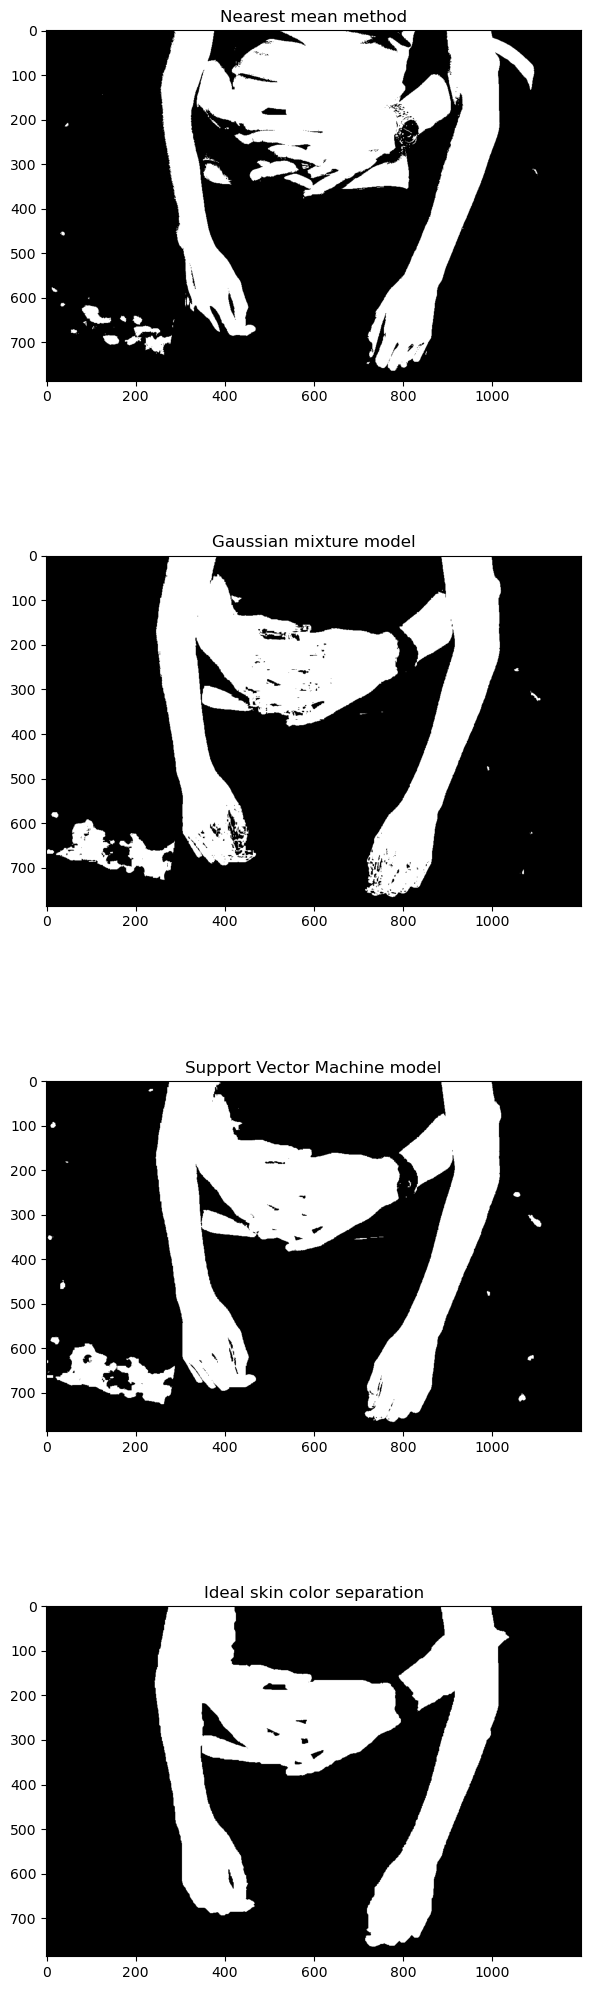

In [73]:
fig = plt.figure(figsize=(30,20))

plt.subplot(4, 1, 1)
plt.title('Nearest mean method')
plt.imshow(1 - image_alpha_nm, cmap='gray')
plt.subplot(4, 1, 2)
plt.title('Gaussian mixture model')
plt.imshow(1 - image_alpha_gmm, cmap='gray')
plt.subplot(4, 1, 3)
plt.title('Support Vector Machine model')
plt.imshow(1 - image_alpha_svm, cmap='gray')
plt.subplot(4, 1, 4)
plt.title('Ideal skin color separation')
plt.imshow(data['maskTest'], cmap='gray')

plt.tight_layout()
plt.subplots_adjust(wspace= 0.5,
                    hspace= 0.5)
plt.show()

# Task 3b and 4
- Calculate the true and false positives, true and false negatives.
- Calculate the error rates for the three different methods.
- The more black and white pixels are shown in the images of the difference between the classified and the test image the better is the method.

Number of non-skin pixels / true negatives: 1
Number of skin pixels / true positives: 0
The accuracy for the nearest mean method is 0.3333333333333333
The accuracy for the Gaussian mixture model method is 0.3333333333333333
The accuracy for the SVM method model is 0.3333333333333333


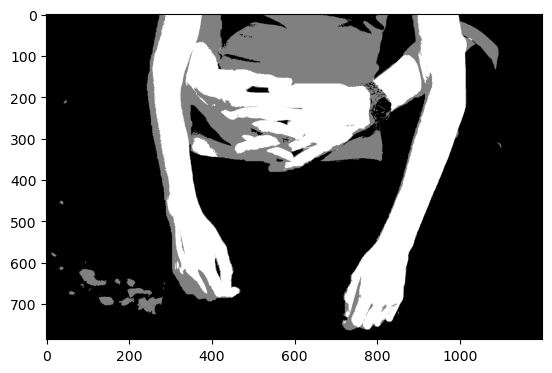

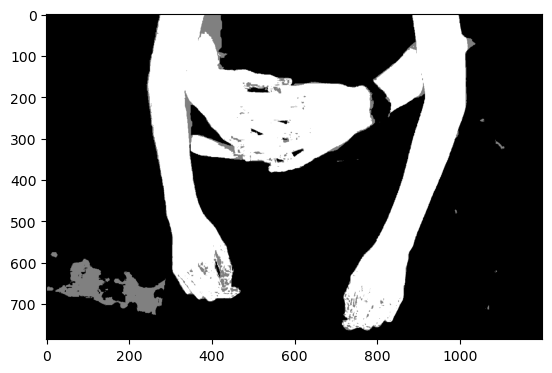

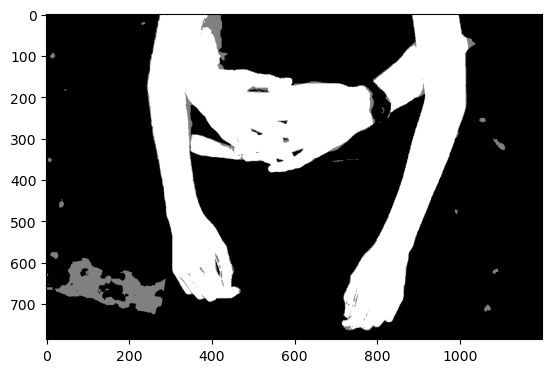

In [128]:
# Converts an image to a 1-dimensional vector
def grayscale_2_vector(img):
    return img.reshape((img.shape[0]*img.shape[1]))

# Convert image maskTest to a 1-dimensional vector
maskTest = data['maskTest']
vector_maskTest= img_2_vector(maskTest )

# Attain the number of skin and non-skin labels
# Get sum of true positives and true negatives from the maskTest image

# Number of non-skin pixels, true negatives
black = 0.0
true_negatives = len(np.where(vector_maskTest==black))
print('Number of non-skin pixels / true negatives:', true_negatives)

# Number of skin pixels, true positives
white = 1.0
true_positives = len(vector_maskTest[vector_maskTest[0]==white])
print('Number of skin pixels / true positives:', true_positives)

# Calculate the difference of the vectors in relation to the maskTest image
# Thus, get the number of false negatives and positives
# Difference: 1 - 1 = 0 -> True positive
# Difference: 0 - 1 = -1 -> False positive
# Difference: 1 - 0 = 1 -> False negative
# Difference: 0 - 0 = 0 -> True negative
difference_nm = vector_maskTest - alpha_nm[0]
difference_gmm = vector_maskTest - alpha_gmm[0]
difference_svm = vector_maskTest - alpha_svm[0]

# Number of false negatives
false_positive = -1.0
fp_nm = len(np.where(difference_nm==false_positive))
fp_gmm = len(np.where(difference_gmm==false_positive))
fp_svm = len(np.where(difference_svm==false_positive))

# Number of false positives
false_negative = 1.0
fn_nm = len(np.where(difference_nm==false_negative))
fn_gmm = len(np.where(difference_gmm==false_negative))
fn_svm = len(np.where(difference_svm==false_negative))

# Calculate accuracy
sum_tp_tn =  true_positives + true_negatives
accuracy_nm = sum_tp_tn/(sum_tp_tn+fp_nm+fn_nm)
accuracy_gmm = sum_tp_tn/(sum_tp_tn+fp_gmm+fn_gmm)
accuracy_svm = sum_tp_tn/(sum_tp_tn+fp_svm+fn_svm)

# Print accuracy
print(f'The accuracy for the nearest mean method is {accuracy_nm}')
print(f'The accuracy for the Gaussian mixture model method is {accuracy_gmm}')
print(f'The accuracy for the SVM method model is {accuracy_svm}')


plt.imshow(maskTest - image_alpha_nm, cmap='gray')
plt.show()
plt.imshow(maskTest - image_alpha_gmm, cmap='gray')
plt.show()
plt.imshow(maskTest - image_alpha_svm, cmap='gray')
plt.show()

# Result by inspecting the image
- SVM and Gaussiam mixture methods perform similar, both perform better than the nearest mean method.

# Problems
- Pictures with broad tensity distribution, e.g. face halves in light and shadow
- Colored skin
- Skin with similar hues than the environement, e.g. white colored people on whitish sand dunes